In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
number_of_samples = 21000

In [4]:
data_attack = pd.read_csv('C:/Users/Dell/Desktop/Thesis/data thesis/only http 4loic.csv',nrows= number_of_samples)

In [5]:
data_normal = pd.read_csv('C:/Users/Dell/Desktop/Thesis/data thesis/normal http traffic 2.csv', nrows = number_of_samples)

In [6]:
print(data_normal.columns)

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Epoch Time', 'Time shift for this packet',
       'Time delta from previous captured frame',
       'Time delta from previous displayed frame',
       'Time since reference or first frame', 'Frame Number',
       'Frame length on the wire', 'Frame is marked', 'Version',
       'Header Length', 'Total Length', 'Reserved bit', 'Dont fragment',
       'More fragments', 'Fragment Off1', 'Time to Live', 'Source Port',
       'Destination Port', 'Sequence Number', 'Sequence Number.1',
       'Next Sequence Number', 'Acknowledgment Number',
       'Acknowledgment number (raw)', 'Window', 'Calculated window size',
       'Stream index', 'TCP Segment Len', 'Header Length.1',
       'Window size scaling factor',
       'Time since first frame in this TCP stream',
       'Time since previous frame in this TCP stream', 'Request Method',
       'Response in frame', 'Length.1', 'class'],
      dtype='object')


In [7]:
data_normal.columns=['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Epoch Time', 'Time shift for this packet',
       'Time delta from previous captured frame',
       'Time delta from previous displayed frame',
       'Time since reference or first frame', 'Frame Number',
       'Frame length on the wire', 'Frame is marked', 'Version',
       'Header Length', 'Total Length', 'Reserved bit', 'Dont fragment',
       'More fragments', 'Fragment Off1', 'Time to Live', 'Source Port',
       'Destination Port', 'Sequence Number', 'Sequence Number.1',
       'Next Sequence Number', 'Acknowledgment Number',
       'Acknowledgment number (raw)', 'Window', 'Calculated window size',
       'Stream index', 'TCP Segment Len', 'Header Length.1',
       'Window size scaling factor',
       'Time since first frame in this TCP stream',
       'Time since previous frame in this TCP stream', 'Request Method',
       'Response in frame', 'Length.1', 'class']
data_attack.columns=['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Epoch Time', 'Time shift for this packet',
       'Time delta from previous captured frame',
       'Time delta from previous displayed frame',
       'Time since reference or first frame', 'Frame Number',
       'Frame length on the wire', 'Frame is marked', 'Version',
       'Header Length', 'Total Length', 'Reserved bit', 'Dont fragment',
       'More fragments', 'Fragment Off1', 'Time to Live', 'Source Port',
       'Destination Port', 'Sequence Number', 'Sequence Number.1',
       'Next Sequence Number', 'Acknowledgment Number',
       'Acknowledgment number (raw)', 'Window', 'Calculated window size',
       'Stream index', 'TCP Segment Len', 'Header Length.1',
       'Window size scaling factor',
       'Time since first frame in this TCP stream',
       'Time since previous frame in this TCP stream', 'Request Method',
       'Response in frame', 'Length.1', 'class']

In [8]:
data_normal=data_normal.drop(['No.', 'Source', 'Destination','Protocol'],axis=1)
data_attack=data_attack.drop(['No.', 'Source', 'Destination','Protocol'],axis=1)

In [9]:
features=['Time', 'Length',
       'Epoch Time', 'Time shift for this packet',
       'Time delta from previous captured frame',
       'Time delta from previous displayed frame',
       'Time since reference or first frame', 'Frame Number',
       'Frame length on the wire', 'Frame is marked', 'Version',
       'Header Length', 'Total Length', 'Reserved bit', 'Dont fragment',
       'More fragments', 'Fragment Off1', 'Time to Live', 'Source Port',
       'Destination Port', 'Sequence Number', 'Sequence Number.1',
       'Next Sequence Number', 'Acknowledgment Number',
       'Acknowledgment number (raw)', 'Window', 'Calculated window size',
       'Stream index', 'TCP Segment Len', 'Header Length.1',
       'Window size scaling factor',
       'Time since first frame in this TCP stream',
       'Time since previous frame in this TCP stream', 'Request Method',
       'Response in frame', 'Length.1']

In [10]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [11]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [12]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1

In [13]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [14]:
X.shape

(42000, 36)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:42000], test_size = 0.2)

In [16]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [17]:
model = create_baseline()

In [20]:
history = model.fit(X_train.astype(np.float32), Y_train.astype(np.float32), epochs = 15,validation_split=0.2, verbose = 1)

Epoch 1/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1441 - accuracy: 0.9674 - val_loss: 0.1564 - val_accuracy: 0.9677
Epoch 2/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1495 - accuracy: 0.9676 - val_loss: 0.1431 - val_accuracy: 0.9686
Epoch 3/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1458 - accuracy: 0.9676 - val_loss: 0.1449 - val_accuracy: 0.9686
Epoch 4/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1431 - accuracy: 0.9677 - val_loss: 0.1421 - val_accuracy: 0.9658
Epoch 5/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1397 - accuracy: 0.9675 - val_loss: 0.1395 - val_accuracy: 0.9677
Epoch 6/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1387 - accuracy: 0.9675 - val_loss: 0.1364 - val_accuracy: 0.9686
Epoch 7/15
840/840 [==============================] - 11s 13ms/step - loss: 0.1386 - accuracy: 0.9673 - val_loss: 0.1344 - val_accuracy:

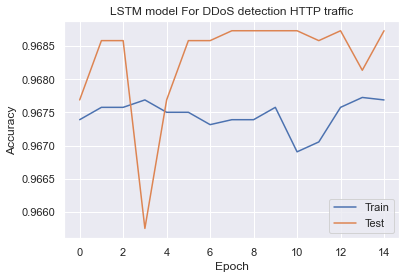

In [21]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM model For DDoS detection HTTP traffic')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

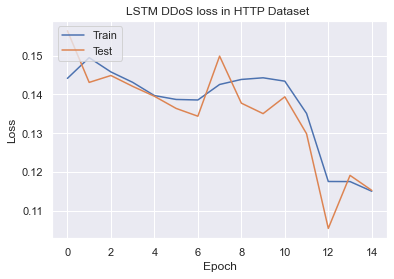

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM DDoS loss in HTTP Dataset ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [23]:
predict = model.predict(X_test, verbose=1)

263/263 [==============================] - 2s 5ms/step


In [24]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

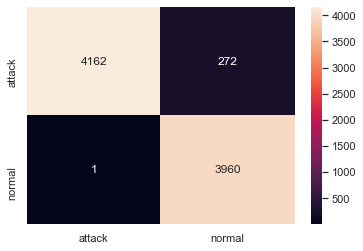

In [25]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["attack","normal"],columns = ["attack","normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")